In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mutual_info_score

In [ ]:
# Load the data
file_path = 'RFLFSODataFull.csv'
data = pd.read_csv(file_path)

# Convert to a classification type
data['SYNOPCode'] = data['SYNOPCode'].astype('category')

In [6]:
data

,FSO_Att,RFL_Att,AbsoluteHumidity,AbsoluteHumidityMax,AbsoluteHumidityMin,Distance,Frequency,Particulate,ParticulateMax,ParticulateMin,...,TemperatureMax,TemperatureMin,Time,Visibility,VisibilityMax,VisibilityMin,WindDirection,WindSpeed,WindSpeedMax,WindSpeedMin
0,7.913289,6.927868,17.595709,17.615907,17.340148,2115.338398,83500000000,0.000000,0.000000,0.000000,...,26.603030,24.680849,9,65884.518460,72336.362233,65617.543754,88.755450,3.057066,6.863808,3.007939
1,7.451176,4.412096,17.549693,17.572415,17.299439,2113.999257,73500000000,0.000000,0.000000,0.000000,...,26.377164,24.313108,9,64963.410920,68753.386153,60379.327485,99.790057,2.727910,6.468903,2.537393
2,7.072747,6.268740,17.290230,17.644014,16.037894,2118.689047,83500000000,0.000000,0.000000,0.000000,...,27.670822,23.150277,10,54794.281070,54821.773817,50850.155963,65.730085,1.674810,2.826916,1.640809
3,6.949288,4.317853,16.820880,17.066776,15.895622,2114.632339,73500000000,0.000000,0.000000,0.000000,...,26.522100,23.174815,10,50205.641590,52519.927530,45374.510898,88.127497,0.962068,2.780643,0.886951
4,7.361052,6.114514,16.813820,17.953974,15.227225,2116.786055,83500000000,0.000000,0.000000,0.000000,...,26.305736,24.864100,10,59038.325990,64418.329138,54461.246506,84.167414,1.881007,4.476298,1.874052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91374,9.150012,11.968291,23.283256,24.142871,22.169805,3970.846129,83500000000,0.000000,0.000000,0.000000,...,27.257926,26.013205,4,13041.847800,13458.340663,12411.852994,91.391749,0.000000,0.027596,0.000000
91375,9.333777,11.538030,23.259618,25.104895,21.005496,3969.230652,73500000000,0.000000,0.000000,0.000000,...,28.101044,25.032282,4,15959.633590,16232.735439,15345.485232,47.997946,0.075640,0.349551,0.069834
91376,8.873168,11.491891,23.331697,23.996130,22.148649,3968.373512,83500000000,0.000000,0.000000,0.000000,...,28.249678,26.205773,4,13129.663750,13948.560177,11925.979953,103.963102,0.052282,0.178062,0.049824
91377,9.538886,11.526529,21.241027,21.624932,20.736391,3967.550165,73500000000,29.693160,30.761540,28.497137,...,26.880084,25.031934,5,15082.787860,15522.762221,14842.654291,82.090779,0.443520,1.838449,0.413146


In [ ]:
sampled_data = data
categories = sampled_data['SYNOPCode'].cat.categories
category_counts = sampled_data['SYNOPCode'].value_counts()
print(category_counts)
print(categories)

SYNOPCode
0    56964
6    25018
5     6605
8     1716
4      466
7      419
3      191
Name: count, dtype: int64
Index([0, 3, 4, 5, 6, 7, 8], dtype='int64')


In [ ]:
# Important features of RF independent model
fso_features = sampled_data[['AbsoluteHumidity', 'Distance', 'Particulate', 'ParticulateMin', 'RelativeHumidity', 'Temperature', 'TemperatureMin', 'Time', 'Visibility', 'VisibilityMin']]

# Important features of FSO independent model
rf_features =  sampled_data[['AbsoluteHumidity', 'Distance', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'SYNOPCode', 'Temperature', 'Visibility']]

rf_att = sampled_data['RFL_Att'] 
fso_att = sampled_data['FSO_Att']  

# Use independent models to make predictions

In [ ]:
# RF model
rf_model = RandomForestRegressor(max_depth=20, min_samples_split=2, n_estimators=200)
rf_model.fit(rf_features, rf_att)

# Predicted RF attenuation
rf_pred = rf_model.predict(rf_features)
rf_rmse = np.sqrt(mean_squared_error(rf_att, rf_pred))
rf_r2 = r2_score(rf_att, rf_pred)
print("Method 1 RF RMSE:", rf_rmse)
print("Method 1 RF R²:", rf_r2)

# Predicted FSO attenuation
fso_model = RandomForestRegressor(max_depth=None, min_samples_split=2, n_estimators=200)
fso_model.fit(fso_features, fso_att)

# 预测FSO衰减
fso_pred = fso_model.predict(fso_features)
fso_rmse = np.sqrt(mean_squared_error(fso_att, fso_pred))
fso_r2 = r2_score(fso_att, fso_pred)
print("Method 1 FSO RMSE:", fso_rmse)
print("Method 1 FSO R²:", fso_r2)

Method 1 RF RMSE: 0.33398275952683026
Method 1 RF R²: 0.9905676337978588
Method 1 FSO RMSE: 0.30344461322720245
Method 1 FSO R²: 0.9939580264019994


In [ ]:
# Create a copy of the original data set
data_copy = sampled_data.copy()

# Add the prediction to the copy
data_copy['rf_pred_A'] = rf_pred
data_copy['fso_pred_A'] = fso_pred


# Feature screening function

In [ ]:
def feature_removal_analysis(data, target_column, drop_columns):
    results = []
    removed_features = []

    # Defines the feature set and removes the specified column
    X = data.drop(columns=[target_column] + drop_columns)
    y = data[target_column]
    S = list(X.columns)

    # Initialize the random forest model
    rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

    while len(S) > 0:
        # Train the model using the current feature set
        rf.fit(X[S], y)
        y_pred = rf.predict(X[S])

        # Calculation performance index
        rmse = np.sqrt(mean_squared_error(y, y_pred))
        r2 = r2_score(y, y_pred)

        # Records the current feature set, RMSE, and R2
        results.append((S.copy(), rmse, r2))

        # 打印当前剩余的特征集
        print(f"Remaining features: {S}")

        # If there's only one feature left, get out of the loop
        if len(S) == 1:
            break

        # Identify the least important features
        importances = rf.feature_importances_
        least_important = np.argmin(importances)

        # Remove the least important feature from the feature set
        removed_feature = S.pop(least_important)
        removed_features.append(removed_feature)
        print(f"Removed feature: {removed_feature}, RMSE: {rmse:.4f}, R2: {r2:.4f}")

    results_df = pd.DataFrame(results, columns=['Features', 'RMSE', 'R2'])

    # Extract the RMSE and R2 values
    rmse_values = results_df['RMSE'].tolist()
    r2_values = results_df['R2'].tolist()

    assert len(rmse_values) == len(removed_features) + 1
    assert len(r2_values) == len(removed_features) + 1

    fig, ax1 = plt.subplots(figsize=(14, 8))

    color = 'tab:blue'
    ax1.set_xlabel('Removed Feature', fontsize=23)
    ax1.set_ylabel('RMSE', color=color, fontsize=23)
    ax1.plot(range(len(rmse_values)), rmse_values, color=color, marker='o', label='RMSE')
    ax1.tick_params(axis='y', labelcolor=color, labelsize=16)
    ax1.tick_params(axis='x', labelsize=16)
    ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('R2', color=color, fontsize=23)
    ax2.plot(range(len(r2_values)), r2_values, color=color, marker='o', label='R2')
    ax2.tick_params(axis='y', labelcolor=color, labelsize=16)
    ax2.grid(False)

    ax1.set_xticks(range(len(removed_features) + 1))
    ax1.set_xticklabels(['All Features'] + removed_features, rotation=90, ha='center', fontsize=22)

    if target_column == 'FSO_Att':
        plt.title('FSO Model - RMSE and R2 vs Removed Feature', fontsize=26, fontweight='bold' )
    elif target_column == 'RFL_Att':
        plt.title('RF Model - RMSE and R2 vs Removed Feature', fontsize=26, fontweight='bold')

    plt.tight_layout()
    plt.show()

    return results_df, results_df['Features']


# Identify important features of the joint model

Remaining features: ['AbsoluteHumidity', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin', 'Distance', 'Frequency', 'Particulate', 'ParticulateMax', 'ParticulateMin', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'RelativeHumidity', 'SYNOPCode', 'Temperature', 'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time', 'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindDirection', 'WindSpeed', 'WindSpeedMax', 'WindSpeedMin', 'rf_pred_A']
Removed feature: Frequency, RMSE: 0.2864, R2: 0.9946
Remaining features: ['AbsoluteHumidity', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin', 'Distance', 'Particulate', 'ParticulateMax', 'ParticulateMin', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'RelativeHumidity', 'SYNOPCode', 'Temperature', 'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time', 'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindDirection', 'WindSpeed', 'WindSpeedMax', 'WindSpeedMin', 'rf_pred_A']
Removed feature: RainIntensity, RMSE: 0.

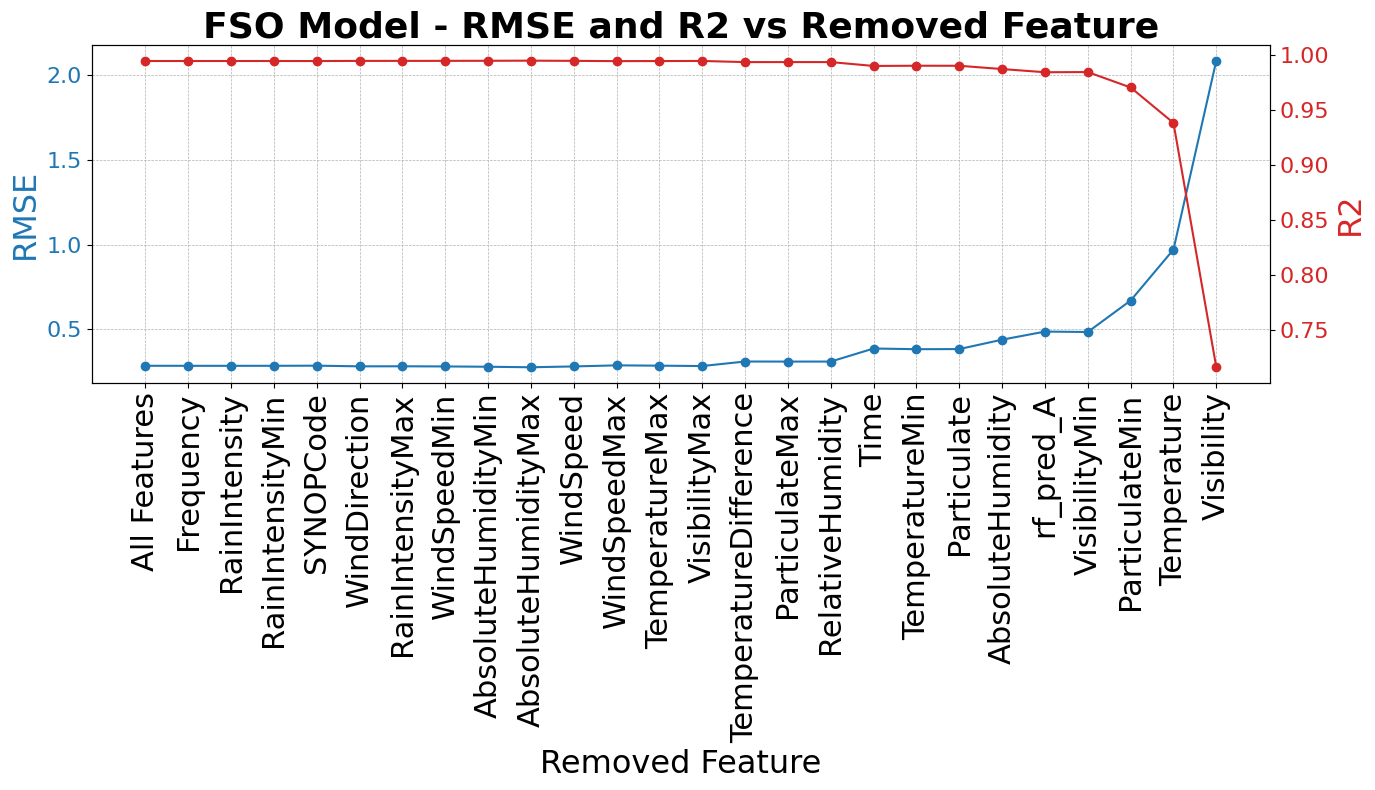

Remaining features: ['AbsoluteHumidity', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin', 'Distance', 'Frequency', 'Particulate', 'ParticulateMax', 'ParticulateMin', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'RelativeHumidity', 'SYNOPCode', 'Temperature', 'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time', 'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindDirection', 'WindSpeed', 'WindSpeedMax', 'WindSpeedMin', 'fso_pred_A']
Removed feature: WindDirection, RMSE: 0.1777, R2: 0.9973
Remaining features: ['AbsoluteHumidity', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin', 'Distance', 'Frequency', 'Particulate', 'ParticulateMax', 'ParticulateMin', 'RainIntensity', 'RainIntensityMax', 'RainIntensityMin', 'RelativeHumidity', 'SYNOPCode', 'Temperature', 'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time', 'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindSpeed', 'WindSpeedMax', 'WindSpeedMin', 'fso_pred_A']
Removed feature: WindSpeedMin, RMSE: 0

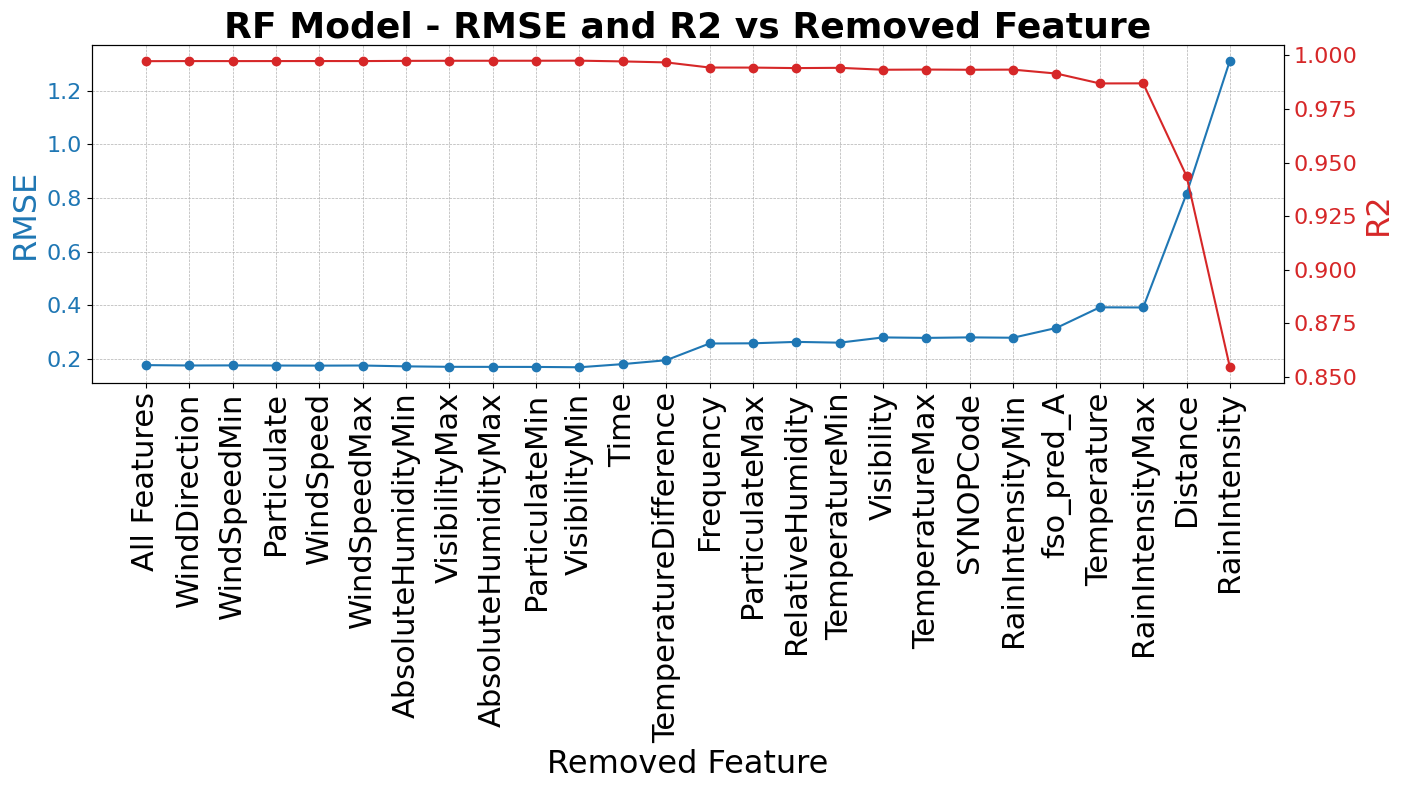

In [12]:
performance_fso = feature_removal_analysis(data=data_copy, target_column='FSO_Att', drop_columns=['RFL_Att', 'fso_pred_A'])
performance_rfl = feature_removal_analysis(data=data_copy, target_column='RFL_Att', drop_columns=['FSO_Att', 'rf_pred_A'])

FSO_new = 'Distance', 'ParticulateMin', 'Temperature', 'Visibility', 'VisibilityMin', 'rf_pred_A' <br>
RFL_new = 'AbsoluteHumidity', 'Distance', 'RainIntensity', 'RainIntensityMax', 'Temperature', 'fso_pred_A'

# Create joint model

In [ ]:
def evaluate_general_model(data, target_column, features):
    
    synop_code_column = 'SYNOPCode'

    # Divide the training set and test set
    X = data[features]
    y = data[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Define a hyperparameter grid for a random forest
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }

    # Use GridSearchCV to find the optimal hyperparameters
    rf = RandomForestRegressor(random_state=42, n_jobs=-1)
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Get the optimal hyperparameters
    best_params = grid_search.best_params_

    # Use optimal hyperparameters to train the model
    best_rf = grid_search.best_estimator_
    best_rf.fit(X_train, y_train)

    # Make predictions on the training set
    y_pred_train = best_rf.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    r2_train = r2_score(y_train, y_pred_train)

    print(f"Training Set Metrics: RMSE (train): {rmse_train:.4f}, R2 (train): {r2_train:.4f}")

    results = []
    categories = data[synop_code_column].unique()

    for category in categories:
        # Filter out the test data for the current category
        category_data = data[(data[synop_code_column] == category) & (data.index.isin(X_test.index))]
        X_category_test = category_data[features]
        y_category_test = category_data[target_column]

        # Make predictions on the test set
        y_pred_test = best_rf.predict(X_category_test)

        # Calculation performance index
        rmse_test = np.sqrt(mean_squared_error(y_category_test, y_pred_test))
        r2_test = r2_score(y_category_test, y_pred_test)

        # Records RMSE and R2 for the current category
        results.append((category, rmse_test, r2_test))
        print(f"Category: {category}, RMSE (test): {rmse_test:.4f}, R2 (test): {r2_test:.4f}")


    results_df = pd.DataFrame(results, columns=['Category', 'RMSE_test', 'R2_test'])
    print("Best Parameters:", best_params)

    # Make predictions for the entire data set
    y_pred_all = best_rf.predict(X)
    rmse_all = np.sqrt(mean_squared_error(y, y_pred_all))
    r2_all = r2_score(y, y_pred_all)
    print(f"Entire Dataset Metrics: RMSE (all): {rmse_all:.4f}, R2 (all): {r2_all:.4f}")

    # Add the prediction results of the complete dataset as a new column
    data[f"{target_column}_pred_B"] = y_pred_all
    
    return results_df, best_params, rmse_all, r2_all


In [ ]:
data = data_copy

# Joint model feature
fso_features = ['Distance', 'ParticulateMin', 'Temperature', 'Visibility', 'VisibilityMin', 'rf_pred_A']
rf_features =  ['AbsoluteHumidity', 'Distance', 'RainIntensity', 'RainIntensityMax', 'Temperature', 'fso_pred_A']

# Evaluate the FSO model
print("Evaluating FSO Model")
performance_fso_df, best_params_fso, rmse_all_fso, r2_all_fso = evaluate_general_model(data, 'FSO_Att', fso_features)


# Evaluate the RF model
print("Evaluating RF Model")
performance_rf_df, best_params_rf,rmse_all_rf, r2_all_rf = evaluate_general_model(data, 'RFL_Att', rf_features)

Evaluating FSO Model
Training Set Metrics: RMSE (train): 0.4521, R2 (train): 0.9867
Category: 0, RMSE (test): 1.1877, R2 (test): 0.8823
Category: 6, RMSE (test): 1.2223, R2 (test): 0.9183
Category: 8, RMSE (test): 1.2563, R2 (test): 0.8923
Category: 5, RMSE (test): 1.0925, R2 (test): 0.9083
Category: 3, RMSE (test): 2.0535, R2 (test): 0.9456
Category: 4, RMSE (test): 1.0787, R2 (test): 0.9228
Category: 7, RMSE (test): 2.2805, R2 (test): 0.8451
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Entire Dataset Metrics: RMSE (all): 0.7588, R2 (all): 0.9622
Evaluating RF Model
Training Set Metrics: RMSE (train): 0.3451, R2 (train): 0.9900
Category: 0, RMSE (test): 0.6125, R2 (test): 0.9422
Category: 6, RMSE (test): 0.9847, R2 (test): 0.9395
Category: 8, RMSE (test): 1.3424, R2 (test): 0.8087
Category: 5, RMSE (test): 0.6861, R2 (test): 0.9438
Category: 3, RMSE (test): 0.5172, R2 (test): 0.9719
Category: 4, RMSE (test): 0.4427, R2 (test): 0.9234
Category: 7, R

# Calculate correlation data and plot

In [ ]:
def plot_correlation_and_mutual_information(data, rfl, fso, title):
    synop_code_mapping = {0: 'Clear Weather', 3: 'Duststorm', 4: 'Fog', 5: 'Drizzle', 6: 'Rain', 7: 'Snow', 8: 'Showers'}
    weather_conditions = list(synop_code_mapping.values())
    positive_pearson, negative_pearson, mutual_info_ratios = [], [], []

    for code in synop_code_mapping.keys():
        subset = data[data['SYNOPCode'] == code]
        rfl_pred, fso_pred = subset[rfl], subset[fso]
        
        # Calculate the Pearson correlation coefficient
        pearson_corr, _ = pearsonr(rfl_pred, fso_pred)
        positive_pearson.append(pearson_corr if pearson_corr >= 0 else np.nan)
        negative_pearson.append(-pearson_corr if pearson_corr < 0 else np.nan)
        
        # Calculate the mutual information ratio
        mutual_info = mutual_info_score(rfl_pred.round(), fso_pred.round())
        joint_entropy = mutual_info_score(rfl_pred.round(), rfl_pred.round())
        mutual_info_ratios.append(mutual_info / joint_entropy if joint_entropy > 0 else 0)

        print(f"{title:<20} {synop_code_mapping[code]:<15} {pearson_corr:<20.4f} {mutual_info_ratios[-1]:<25.4f}")

    fig, ax1 = plt.subplots(figsize=(10, 6))
    

    ax1.text(-1.3, 0.8, 'High\nCorrelation', va='center', ha='center', color='blue', fontsize=15)
    ax1.text(-1.3, 0.6, 'Moderate\nCorrelation', va='center', ha='center', color='blue', fontsize=15)
    ax1.text(-1.3, 0.4, 'Low\nCorrelation', va='center', ha='center', color='blue', fontsize=15)
    ax1.text(-1.3, 0.2, 'Negligible\nCorrelation', va='center', ha='center', color='blue', fontsize=15)


    ax1.scatter(weather_conditions, positive_pearson, color='blue', marker='^', label='Positive Corr. Coeff.')
    ax1.scatter(weather_conditions, negative_pearson, color='blue', marker='s', label='Negative Corr. Coeff.')
    ax1.set_xlabel('Weather Conditions', fontsize=15)
    ax1.set_ylim(0, 1)
    ax1.set_yticks(np.arange(0, 1.1, 0.1))
    ax1.tick_params(axis='both', which='major', labelsize=15)
    ax1.set_xticks(range(len(weather_conditions))) 
    ax1.set_xticklabels(weather_conditions, rotation=45, ha='right') 
    for threshold in [0.7, 0.5, 0.3]:
        ax1.axhline(threshold, color='blue', linestyle='--', alpha=0.5)

    ax2 = ax1.twinx()
    ax2.scatter(weather_conditions, mutual_info_ratios, color='red', marker='o', label='Mutual Information Ratio')
    ax2.set_ylim(0, 1)
    ax2.set_yticks(np.arange(0, 1.1, 0.1))
    ax2.tick_params(axis='both', which='major', labelsize=15)

    ax1.set_title(r'$r_{EO}$', loc='left', color='blue', fontsize=23)
    ax1.set_title(r'$\frac{I_{EO}}{H_{EO}}$', loc='right', color='red', fontsize=23)

    fig.legend(loc="upper left", fontsize=13, bbox_to_anchor=(0,1),bbox_transform=ax1.transAxes)
    plt.title(title, pad=40, fontsize=20)
    plt.tight_layout()
    plt.show()


Correlation analysis of true RFL and FSO values Clear Weather   -0.2677              0.1357                   
Correlation analysis of true RFL and FSO values Duststorm       -0.4243              0.5050                   
Correlation analysis of true RFL and FSO values Fog             0.5779               0.3263                   
Correlation analysis of true RFL and FSO values Drizzle         -0.1556              0.1353                   
Correlation analysis of true RFL and FSO values Rain            0.3483               0.1192                   
Correlation analysis of true RFL and FSO values Snow            0.8045               0.3614                   
Correlation analysis of true RFL and FSO values Showers         -0.1698              0.1737                   


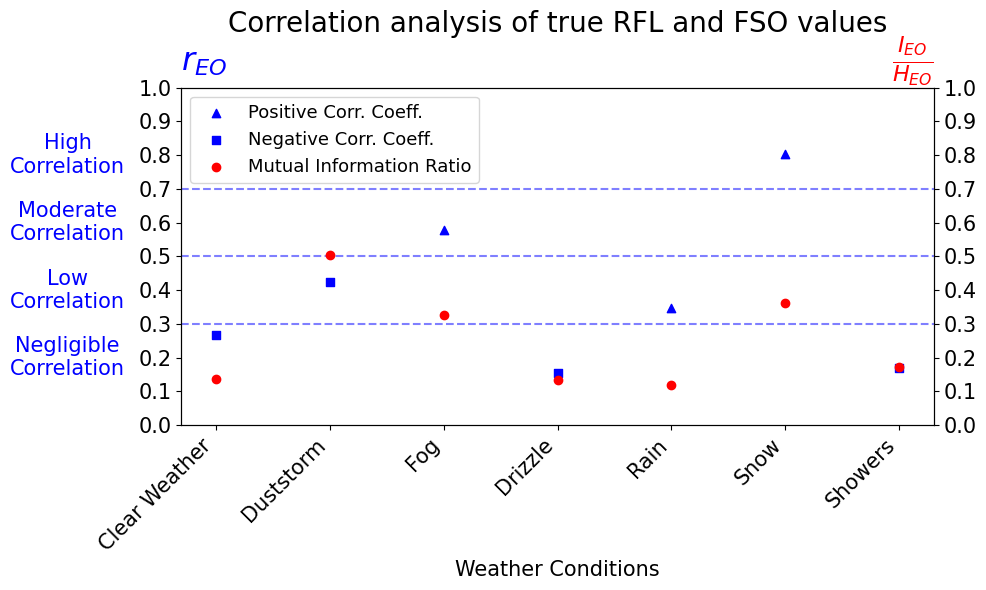

Correlation analysis of RFL and FSO predicted by independent models Clear Weather   -0.2813              0.1593                   
Correlation analysis of RFL and FSO predicted by independent models Duststorm       -0.4392              0.5280                   
Correlation analysis of RFL and FSO predicted by independent models Fog             0.5844               0.3560                   
Correlation analysis of RFL and FSO predicted by independent models Drizzle         -0.1649              0.1434                   
Correlation analysis of RFL and FSO predicted by independent models Rain            0.3481               0.1267                   
Correlation analysis of RFL and FSO predicted by independent models Snow            0.7978               0.3690                   
Correlation analysis of RFL and FSO predicted by independent models Showers         -0.1895              0.1843                   


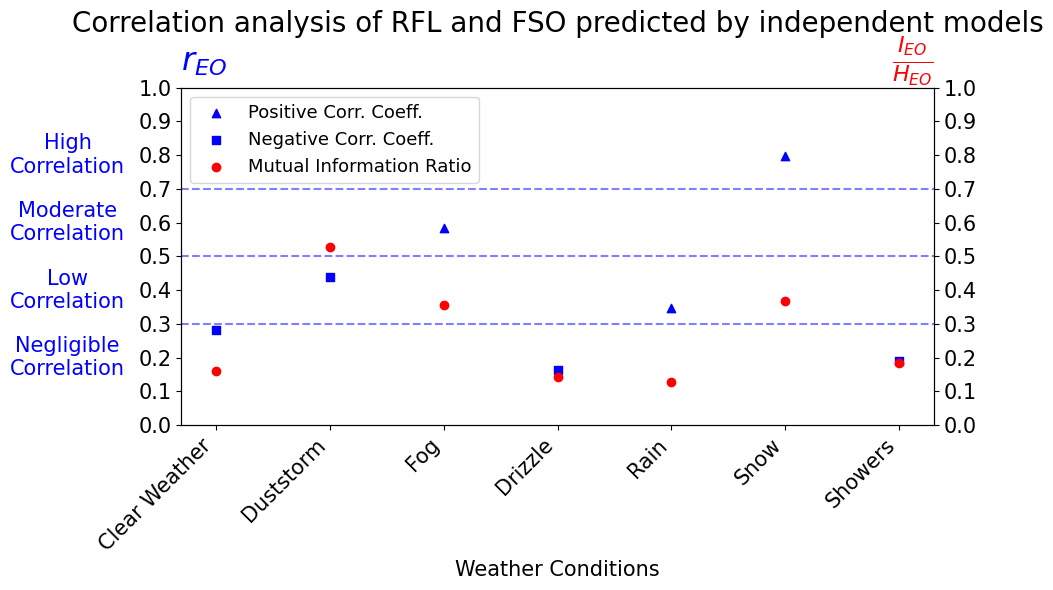

Correlation analysis using RFL to predict FSO Clear Weather   -0.2809              0.1603                   
Correlation analysis using RFL to predict FSO Duststorm       -0.4342              0.5080                   
Correlation analysis using RFL to predict FSO Fog             0.5971               0.3710                   
Correlation analysis using RFL to predict FSO Drizzle         -0.1524              0.1520                   
Correlation analysis using RFL to predict FSO Rain            0.3536               0.1305                   
Correlation analysis using RFL to predict FSO Snow            0.8049               0.4150                   
Correlation analysis using RFL to predict FSO Showers         -0.2187              0.1876                   


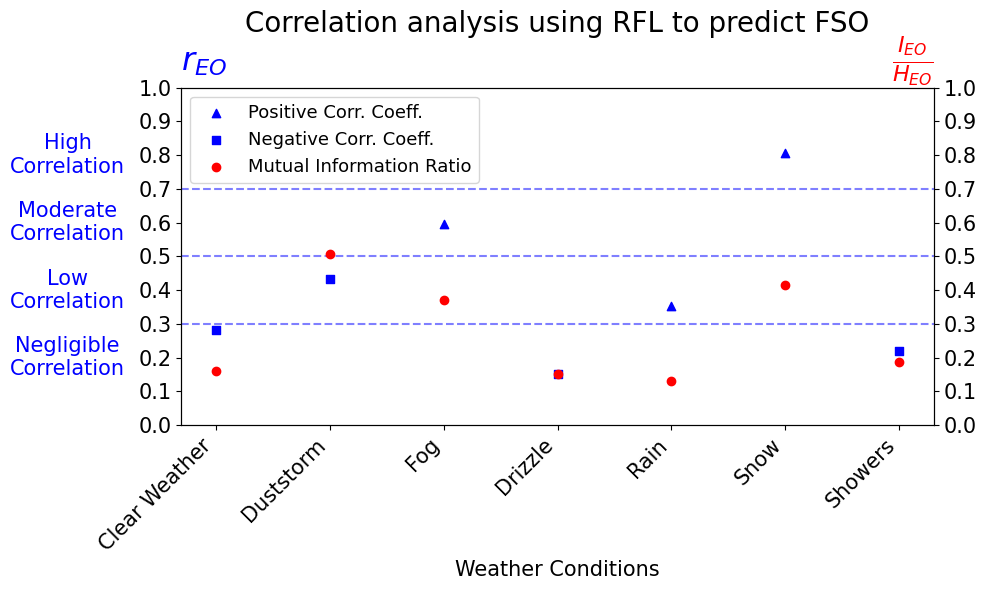

Correlation analysis using FSO to predict RFL Clear Weather   -0.2863              0.1686                   
Correlation analysis using FSO to predict RFL Duststorm       -0.4469              0.5519                   
Correlation analysis using FSO to predict RFL Fog             0.5924               0.3726                   
Correlation analysis using FSO to predict RFL Drizzle         -0.1662              0.1439                   
Correlation analysis using FSO to predict RFL Rain            0.3568               0.1309                   
Correlation analysis using FSO to predict RFL Snow            0.7700               0.3348                   
Correlation analysis using FSO to predict RFL Showers         -0.1765              0.1802                   


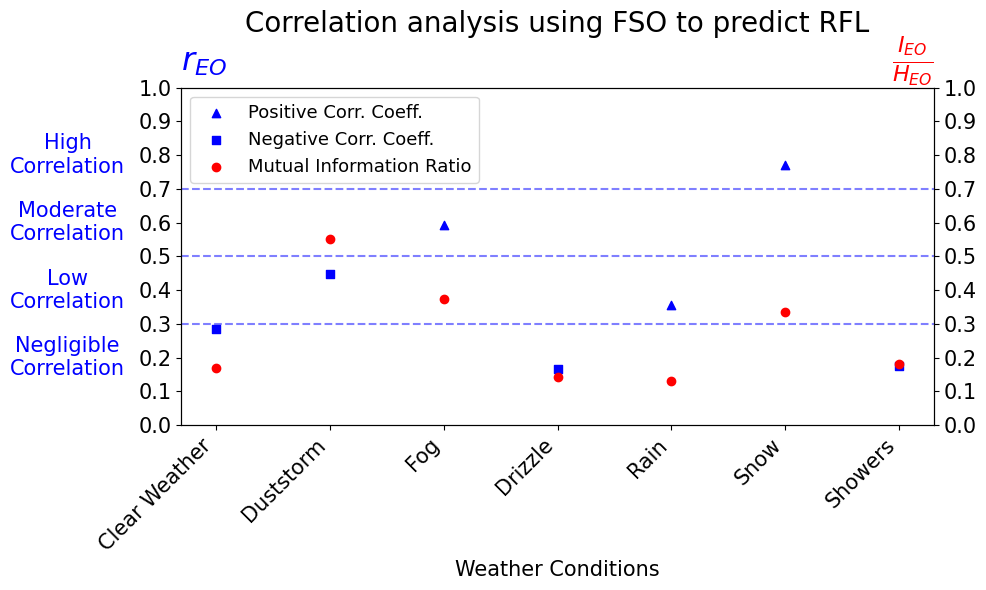

In [ ]:
# true RFL and FSO values
plot_correlation_and_mutual_information(data_copy, 'RFL_Att', 'FSO_Att', "Correlation analysis of true RFL and FSO values")

#independent models
plot_correlation_and_mutual_information(data_copy, 'rf_pred_A', 'fso_pred_A',  "Correlation analysis of RFL and FSO predicted by independent models")

# FSO joint model
plot_correlation_and_mutual_information(data_copy, 'RFL_Att_pred_B', 'fso_pred_A',  "Correlation analysis using RFL to predict FSO")

# RF joint model
plot_correlation_and_mutual_information(data_copy, 'rf_pred_A', 'FSO_Att_pred_B', "Correlation analysis using FSO to predict RFL")


# Draw heat map

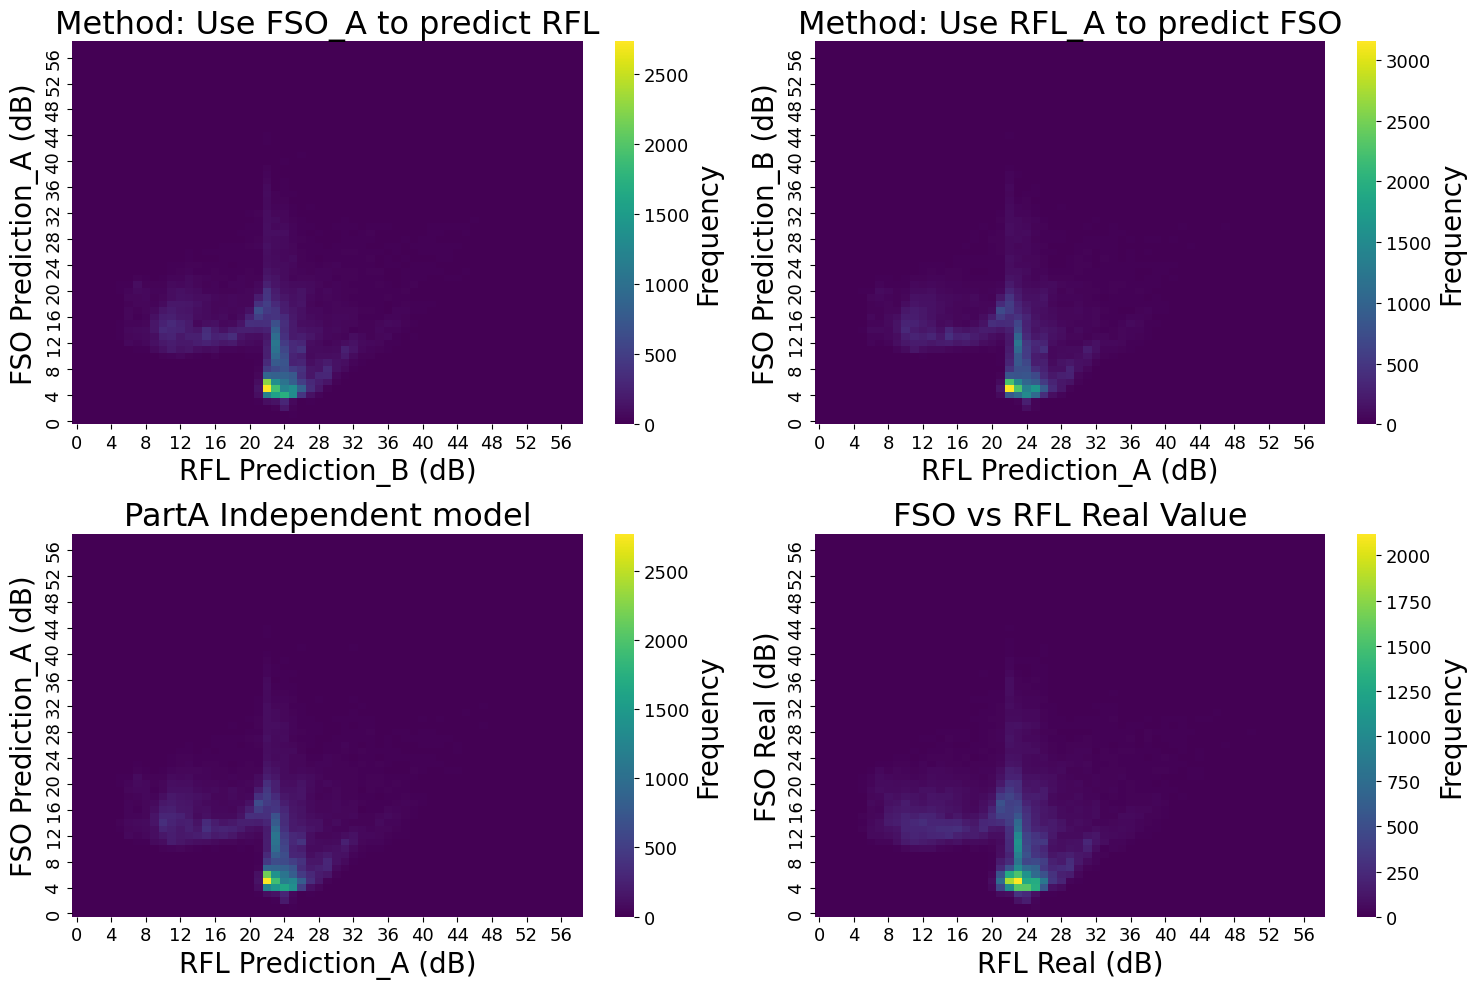

In [ ]:
# Set the bin size
bin_size = 0.5
bins_fso = np.arange(0, 30, bin_size) 
bins_rfl = np.arange(0, 30, bin_size)

def plot_heatmap(ax, x_data, y_data, x_label, y_label, title):
    h_data, x_edges, y_edges = np.histogram2d(x_data, y_data, bins=[bins_rfl, bins_fso])
    sns.heatmap(
        h_data.T,
        xticklabels=4,  
        yticklabels=4,  
        cmap='viridis',
        cbar_kws={'label': 'Frequency'},
        ax=ax
    )
    ax.set_title(title, fontsize=23)  
    ax.set_xlabel(x_label, fontsize=20)  
    ax.set_ylabel(y_label, fontsize=20)  
    ax.invert_yaxis() 
    ax.tick_params(axis='both', which='major', labelsize=13)  


    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=13)
    cbar.set_label('Frequency', fontsize=20)

# Create 4 subgraphs divided into two rows and two columns
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharex=False, sharey=False) 
(ax1, ax2), (ax3, ax4) = axes 

# RF joint model
plot_heatmap(
    ax=ax1, 
    x_data=data_copy['RFL_Att_pred_B'], 
    y_data=data_copy['fso_pred_A'], 
    x_label='RFL Prediction_B (dB)', 
    y_label='FSO Prediction_A (dB)', 
    title='Method: Use FSO_A to predict RFL'
)

# FSO joint model
plot_heatmap(
    ax=ax2, 
    x_data=data_copy['rf_pred_A'], 
    y_data=data_copy['FSO_Att_pred_B'], 
    x_label='RFL Prediction_A (dB)', 
    y_label='FSO Prediction_B (dB)', 
    title='Method: Use RFL_A to predict FSO'
)

# Independent model
plot_heatmap(
    ax=ax3, 
    x_data=data_copy['rf_pred_A'], 
    y_data=data_copy['fso_pred_A'], 
    x_label='RFL Prediction_A (dB)', 
    y_label='FSO Prediction_A (dB)', 
    title='PartA Independent model'
)

# FSO vs RFL Real Value
plot_heatmap(
    ax=ax4, 
    x_data=data_copy['RFL_Att'], 
    y_data=data_copy['FSO_Att'], 
    x_label='RFL Real (dB)', 
    y_label='FSO Real (dB)', 
    title='FSO vs RFL Real Value'
)

plt.tight_layout()
plt.show()


# Draw a data comparison chart

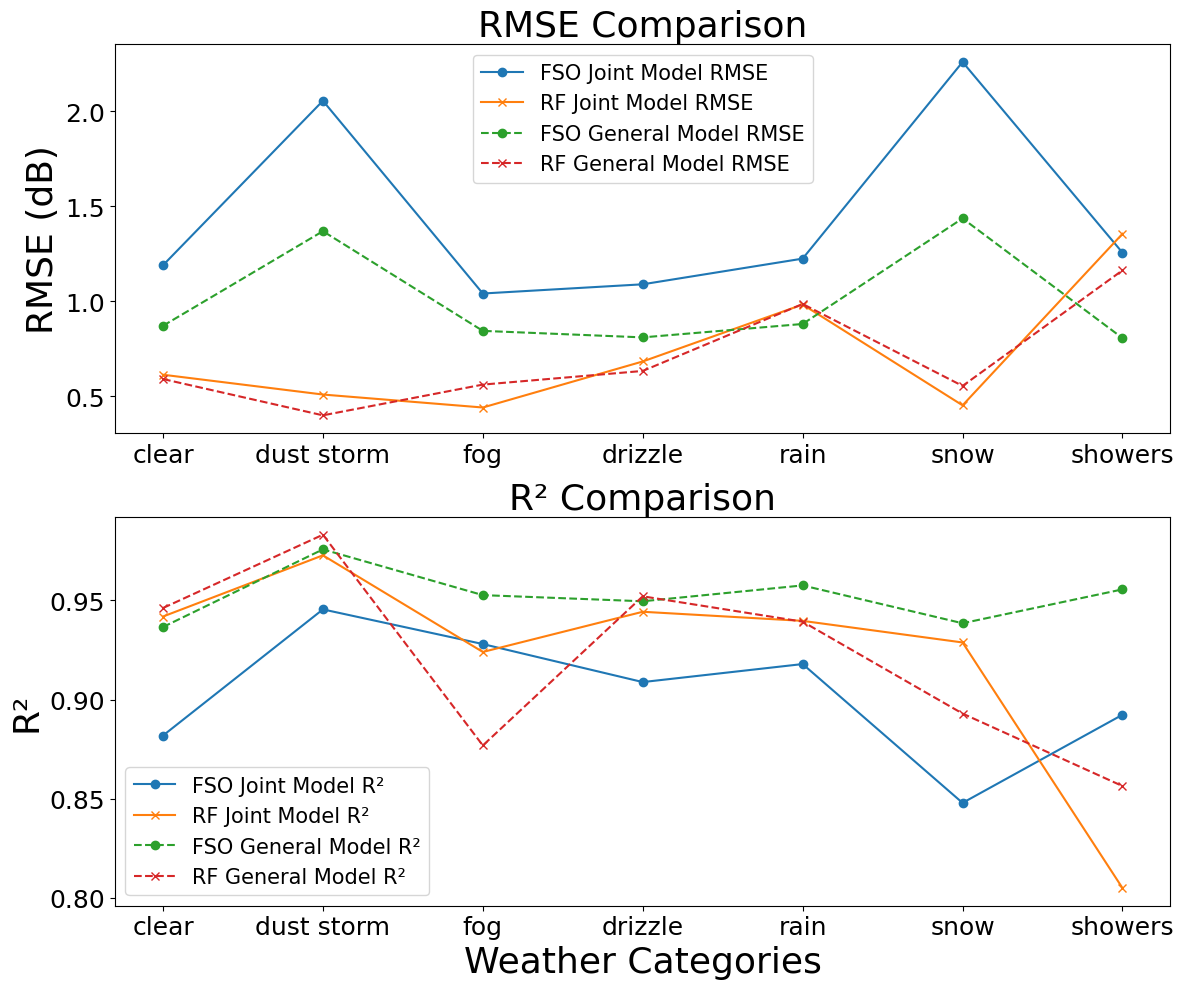

In [2]:
import matplotlib.pyplot as plt

# Data from the models
category_order = [0, 3, 4, 5, 6, 7, 8]
category_labels = ['clear', 'dust storm', 'fog', 'drizzle', 'rain', 'snow', 'showers']

# General Model Data
rmse_rf_general = [0.5910, 0.3999, 0.5617, 0.6336, 0.9862, 0.5548, 1.1635]
r2_rf_general = [0.9462, 0.9832, 0.8768, 0.9521, 0.9393, 0.8929, 0.8563]

rmse_fso_general = [0.8714, 1.3694, 0.8446, 0.8103, 0.8809, 1.4367, 0.8066]
r2_fso_general = [0.9366, 0.9758, 0.9527, 0.9496, 0.9576, 0.9385, 0.9556]

# Joint Model Data
rmse_rf_joint = [0.6137, 0.5094, 0.4411, 0.6835, 0.9832, 0.4526, 1.3558]
r2_rf_joint = [0.9419, 0.9728, 0.9240, 0.9443, 0.9397, 0.9288, 0.8048]

rmse_fso_joint = [1.1901, 2.0560, 1.0413, 1.0898, 1.2250, 2.2602, 1.2564]
r2_fso_joint = [0.8818, 0.9455, 0.9280, 0.9088, 0.9179, 0.8478, 0.8923]

# Plotting
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Plot RMSE
axes[0].plot(category_labels, rmse_fso_joint, marker='o', label='FSO Joint Model RMSE')
axes[0].plot(category_labels, rmse_rf_joint, marker='x', label='RF Joint Model RMSE')
axes[0].plot(category_labels, rmse_fso_general, marker='o', linestyle='--', label='FSO General Model RMSE')
axes[0].plot(category_labels, rmse_rf_general, marker='x', linestyle='--', label='RF General Model RMSE')
axes[0].set_title('RMSE Comparison', fontsize=26)
axes[0].set_ylabel('RMSE (dB)', fontsize=26)
axes[0].tick_params(axis='both', which='major', labelsize=18)
axes[0].legend(fontsize=15)

# Plot R²
axes[1].plot(category_labels, r2_fso_joint, marker='o', label='FSO Joint Model R²')
axes[1].plot(category_labels, r2_rf_joint, marker='x', label='RF Joint Model R²')
axes[1].plot(category_labels, r2_fso_general, marker='o', linestyle='--', label='FSO General Model R²')
axes[1].plot(category_labels, r2_rf_general, marker='x', linestyle='--', label='RF General Model R²')
axes[1].set_title('R² Comparison', fontsize=26)
axes[1].set_ylabel('R²', fontsize=26)
axes[1].tick_params(axis='both', which='major', labelsize=18)
axes[1].legend(fontsize=15)

plt.xlabel('Weather Categories', fontsize=26)
plt.tight_layout()
plt.show()